In this module, we study how to implement the K-means clustering algorithm. We first give a brief overview on clustering algorithm as a whole and then discuss details related to the most common clustering algorithm for numeric data: K-means clustering. 

Clustering is a method of unsupervised learninng. There are different types of clustering algorithms, depending on which angle we can look at it: 1) hierarchical vs. partitional, 2) exclusive vs. overlapping vs. fuzzy, and 3) complete vs. partial. We can also look at clustering based on the type of clusters: 1) well-separated, 2) prototype-based, 3) graph-based, 4) density-based, and 5) conceptual clusters. We can also look at clustering based on the modeling approach: 1) connectivity-based, 2) centroid-based, 3) distribution-based, and 4) density-based.

Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types: 1) agglomerative, and 2) divisive. Agglomerative clustering is a "bottom up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy. Divisive clustering is a "top down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

An overlapping or non-exclusive clustering is used to reflect the fact that an object can simultaneously belong to more than one group (e.g. adjunct professor working for two community colleges etc.). In a fuzzy clustering, every object belongs to every cluster with a membersihp weight that is between 0 and 1 (clusters are treated as fuzzy sets).

A complete clustering assigns every object to a cluster, whereas a partial clustering does not (because sometimes membership may not be well-defined).

A well-separated cluster is a set of objects in which each object is closer (or more similar) to every other object in the cluster than to any object not in the cluster. Well-separated clusters do not need to be globular, but can have any shape (e.g. nationality, racial segregation). A prototype-based cluster is a set of objects in which each object is closer (or more similar) to the prototype that defines the cluster than to the prototype of any other cluster (e.g. centroids or medoid as representation). This is also called a center-based cluster. Graph-based clusters are based on some graphic definitions. If the data is represented as a graph, where the nodes are objects and the links represent connectoins among objects, then a cluster can be defined as a connected component (e.g. contiguity-based clusters and cliques). This definition is useful when the clusters are irregular or intertwined but can have trouble when noise is present. A density-based cluster is a set of objects within a dense region that is surrounded by a region of low density. This definition becomes useful when the clusters are irregular or intertwined, and when noise and outliers are present. Conceptual clusters, is usually built based on some abstract concepts. 

We now dig into K-means clustering. To start with, prototype-based clustering techniques create only one-level partitioning of the data objects, the most common of which are K-means and K-medoid. K-means defines a prototype in terms of a centroid, which is usually the mean of a group of points, and is typically applied to objects in a continuous Euclidean space. K-medoid defines a prototype in terms of a medoid, which is the most representative point for a group of points, and can be applied to a wide-range of data since it requires only a proximity
measure for a pair of objects. A medoid must be an actual data point.

We can also look at K-means clustering as a centroid-based clustering. In this setting, clusters are represented by a central vector, which may not necessarily be a member of the data set. When the number of clusters is fixed to K, K-means clustering gives a formal definition as an optimization problem: find the K cluster centers and assign the objects to the nearest cluster center, such that the squared distances from the cluster are minimized.

Here is the algorithm for K-means clustering: we first choose K initial centroids, where K is a user-specified parameter (then number of clusters). Each point is then assigned to the closest centroid, and each collection of points assigned to a centroid is a cluster. The centroid of each cluster is then updated/recomputed based on the points assigned to the cluster. We repeat the assignment and update steps until no point changes clusters, or equivalently until the centroids remain the same. We use the sum of the squared error (SSE) as our criterion function. That is, we calculate the error of each data point to the closest centroid, and then compute the total sum of the squared errors (SST). The idea behind is that a good clustering is one for which the within-cluster variation is as small as possible.

For some combinations of proximity functions and types of centroids, K-means always converges to a solution (so the centroids don’t change any more). However, the solution is local in nature. So a common practice is to run the algorithm multiple times from different random initial configurations then selects the best solution.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist

%matplotlib inline

We will now use an eduation dataset as our illustrative example. The dataset contains 777 observations on the following 18 variables:

* Private: a factor with levels 'No' and 'Yes' indicating private or public university
* Apps: number of applications received
* Accept: number of applications accepted
* Enroll: number of new students enrolled
* Top10perc Pct.: new students from top 10% of H.S. class
* Top25perc Pct.: new students from top 25% of H.S. class
* F.Undergrad: number of fulltime undergraduates
* P.Undergrad: number of parttime undergraduates
* Outstate: out-of-state tuition
* Room.Board: room and board costs
* Books: estimated book costs
* Personal: estimated personal spending
* PhD: percentage of faculty with Ph.D.’s
* Terminal: percentage of faculty with terminal degree
* S.F.Ratio: student/faculty ratio
* perc.alumni: percentage of alumni who donate
* Expend: instructional expenditure per student
* Grad.Rate: graduation rate

In [2]:
path='C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\\Introduction to Data Science Using Python\\datasets'
os.chdir(path)
df = pd.read_csv('College_Data',index_col=0)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB
None


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Now let's do some explorative data analysis. To start with, let's create a scatterplot of 'Grad.Rate' versus 'Room.Board' where the points are colored by the Private column. 

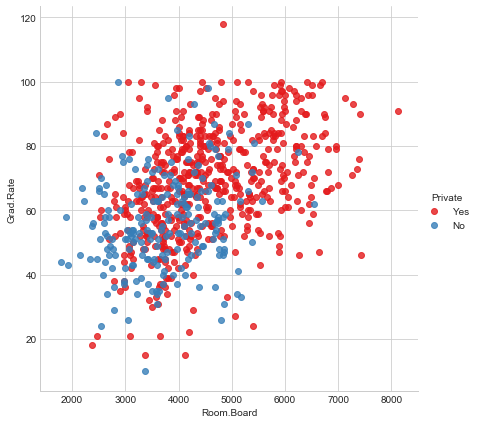

In [3]:
sns.set_style('whitegrid')
sns.lmplot('Room.Board', 'Grad.Rate', data=df, hue='Private', palette='Set1', size=6, aspect=1, fit_reg=False)

Let's create a stacked histogram showing Out of State Tuition based on the Private column:

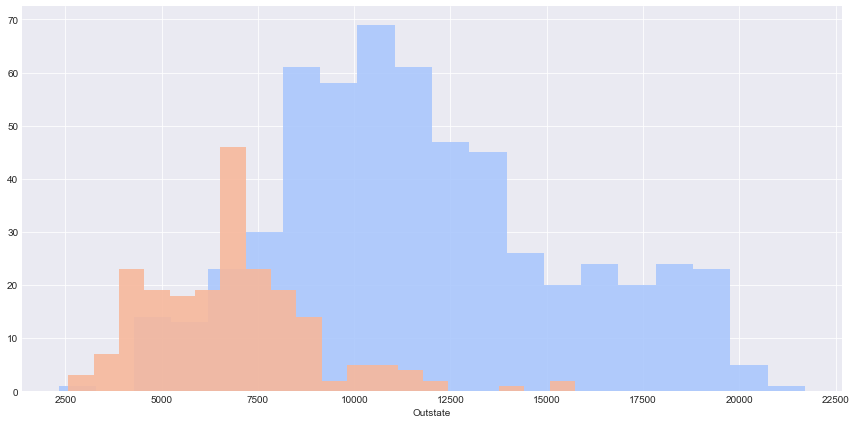

In [4]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df, hue="Private", palette='coolwarm', size=6, aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.9)

Let's create a similar histogram for the Grad.Rate column:

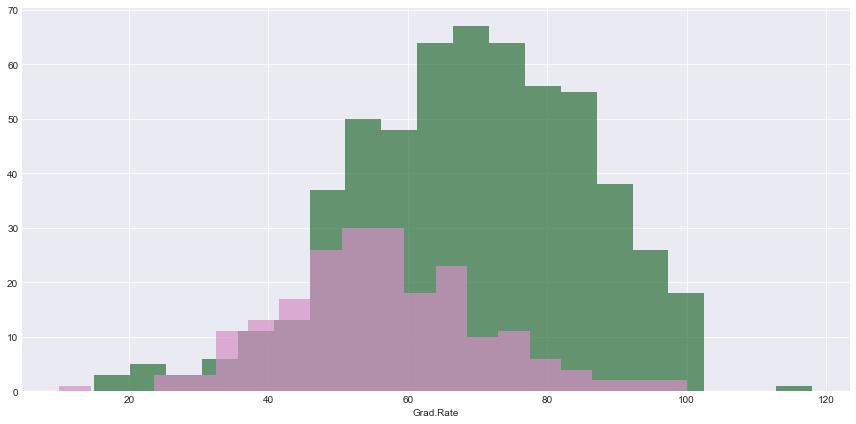

In [5]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df, hue="Private", palette='cubehelix', size=6, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

Notice how there seems to be a private school with a graduation rate of higher than 100%. We need to set that number to 100. Finally, we will drop the 'Private' column since it's categorical:

In [6]:
df.loc[df['Grad.Rate'] > 100, 'Grad.Rate']=100
print(df[df['Grad.Rate'] > 100])
df.drop('Private', axis=1, inplace=True)

Empty DataFrame
Columns: [Private, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []


Now let's perform K-means clustering. We do not need to do training-test split here because we are performing unsupervised learning. We create an instance of the K-means clustering through KMeans(). This function has several arguments, below are some highlights:

  1. n_clusters: the number of clusters to form as well as the number of centroids to generate (default is 8).
  2. init: the method for initialization (defaults to ‘k-means++’). The default selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. The other option includes 'random' (choosing observations at random from data for the initial centroids), and an 'ndarray'. If an actual 'ndarray' is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
  3. n_init: the number of time the k-means algorithm will be run with different centroid seeds (default is 10). The final results will be the best output of n_init consecutive runs in terms of inertia.
  4. max_iter: int, (default is 300). Maximum number of iterations of the k-means algorithm for a single run.

In [7]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Now let's get the centroid data and the labels:

In [8]:
print('Number of centroids: ', len(kmeans.cluster_centers_))
print('Coordinates of cluster centers:')
print(kmeans.cluster_centers_)
print('Labels of each point:')
print(kmeans.labels_)

Number of centroids:  2
Coordinates of cluster centers:
[[  1.81323468e+03   1.28716592e+03   4.91044843e+02   2.53094170e+01
    5.34708520e+01   2.18854858e+03   5.95458894e+02   1.03957085e+04
    4.31136472e+03   5.41982063e+02   1.28033632e+03   7.04424514e+01
    7.78251121e+01   1.40997010e+01   2.31748879e+01   8.93204634e+03
    6.50926756e+01]
 [  1.03631389e+04   6.55089815e+03   2.56972222e+03   4.14907407e+01
    7.02037037e+01   1.30619352e+04   2.46486111e+03   1.07191759e+04
    4.64347222e+03   5.95212963e+02   1.71420370e+03   8.63981481e+01
    9.13333333e+01   1.40277778e+01   2.00740741e+01   1.41705000e+04
    6.75925926e+01]]
Labels of each point:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 

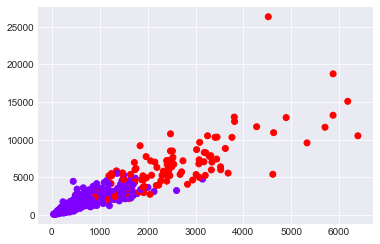

In [9]:
plt.scatter(x=df['Enroll'],y=df['Accept'],c=kmeans.labels_,cmap='rainbow') # the argument 'c' stands for 'color'

The nature of K-means algorithm is the EM-algorithm (Expectation-Maximization). This generic algorithm is a powerful tool that comes up in a variety of contexts within data science. K-means is a particularly simple and easy-to-understand application of the algorithm. In short, the expectation–maximization approach here consists of the following procedure:

   1. Guess some cluster centers
   2. Repeat until converged:
     - E-Step: assign points to the nearest cluster center
     - M-Step: set the cluster centers to the mean
     
Here the 'E-step' or 'Expectation step' is so-named because it involves updating our expectation of which cluster each point belongs to. The 'M-step' or 'Maximization step' is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics. But this is not guaranteed to yield a global optimal solution. 

We now need to discuss how to evaluate clustering algorithms. We start the discussion from a more general setting and then proceed to drill down to the case for K-means clustering. 

One of the central questions for machine learning algorithm is to how to choose hyperparameters. In supervised learning problems, such as decision tree types of methods, model users often need to specify a set of hyperparameter to fine-tune the model so that the model performs well according to certain types of criteria. In unsupervised learning problems, the same ideas hold true, except that now we are not predicting anything here. But we will still need to evaluate the algorithm so that the model is reasonable according to some standard. An example is in K-means clustering, how we should choose the optimal value of K. It is indeed true that in many cases, the researcher knows the value of K a priori based on some domain knowledge, but in many cases, we need to figure out what's the best K-value. One simple method is the elbow method, which is basically a kind of off-the-shelves method that data scientists can easily use to visualize when picking the value for K. The idea is to plot the SSE against the value of K. In general, as K increases, the SSE decreases, but when SSE decreases drastically, we can say that the value of K is 'stabilized'. 

Below we draw the SSEs against differentn values of K. If you would like to highlight the suspected optimal value of K, you would need to uncomment the 'kIdx' statement as well as the 'ax.plot' statement, which are both currently commented out in the production code. 

Text(0.5,1,'Elbow for KMeans clustering')

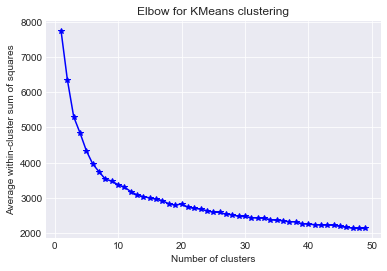

In [11]:
# kIdx = 9 # setting a generic K-value you want to highlight (the suspected K-value)

K_vec = range(1,50)
KM = [KMeans(n_clusters=k).fit(df) for k in K_vec] # making a vector 
centroids = [j.cluster_centers_ for j in KM]

D_k = [cdist(df, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/df.shape[0] for d in dist]
wcss = [sum(d**2) for d in dist] # calculating total within sum of square
tss = sum(pdist(df)**2)/df.shape[0]
bss = tss-wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K_vec, avgWithinSS, 'b*-')
# ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

As you see from the graph above, sometimes the elbow method doesn't work very well. You would expect that the optimal K is set to be somwhere between 8 and 10 because that's when the SSE starts to decrease at a slower rate, but this is not obvious visually and the method has a bit of shaky foundation. 

A more practical method is the silhouette method which is more empirical in nature. Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. Silhouette coefficients (as these values are referred to as) near 1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters,  and negative values indicate that those samples might have been assigned to the wrong cluster. In other words, the silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters. The silhouette is pretty general and can be calculated with any distance metrics.

Keep in mind that you may think about the silhouette value as a degree of how clusters overlap with each other, i.e. -1 implies overlapping perfectly, whereas +1 implies that clusters are perfectly separable. However, also remember that low silhouette values for a particular algorithm does not mean that there are no clusters, rather it means that the algorithm used cannot separate clusters and you may consider tune your algorithm or use a different algorithm. In the example below, we will see that the sihoulettte analysis gives us a bit different result than the elbow method. 

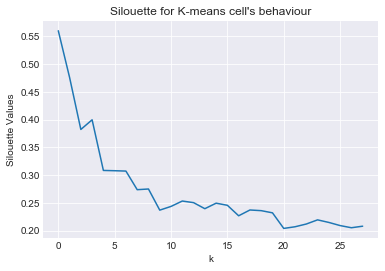

In [12]:
sv = [] # initializing a vector of silhouette values
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sv.append(silhouette_score(df, labels, metric='euclidean'))

plt.plot(sv)
plt.ylabel("Silouette Values")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

To wrap up the discussion, keep in mind that sihoulette analysis is not merely confined to the evaluation of K-means. There are many other methods that require this type of anaysis. However, not all clustering altorighms requires this type of analysis. For example, other algorithms such as DBSCAN and OPTICS algorithm do not require the specification of this parameter. In addition, hierarchical clustering avoids the problem altogether.

Now let's move on to other issues of K-means clustering. In many practices, data scientist perform pre-whitening procedure to the data prior to applying the K-means algorithm. This is particular common when it comes to dealing with image data. One of the main reason is to balance the dimensions of your data so that they contribute similarly toward your distance calculation. For example you want to cluster people using their height (meter) and weight (kilogram). Here is how your data would look like: (1.6, 60), (1.8, 90), (1.4, 55)... 

As you can see, the first dimension of your data, the height, is a lot smaller than the weights. When you cluster with K-means, the distances computed between these points will be skewed toward the weights. That is, the weight contribute a lot more to the distance than the height. So in the end, only the weight matters in your K-means clustering. If you want the height to contribute, you should consider whiten the data first. To be more precise here, a whitening transformation (or sphering transformation) is a linear transformation that transforms a vector of random variables with a known covariance matrix into a set of new variables whose covariance is the identity matrix, meaning that they are uncorrelated and each have variance 1. The transformation is called "whitening" because it changes the input vector into a white noise vector.

One last note about K-means algorithm: the fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries. In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. Consider the following data, along with the cluster labels found by the typical k-means approach:

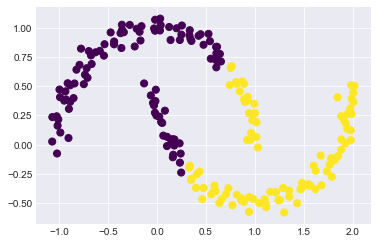

In [13]:
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')

This situation is reminiscent of the discussion in support vector machines algorithm, where we often use a kernel transformation to project the data into a higher dimension where a linear separation is possible. We might imagine using the same trick to allow k-means to discover nonlinear boundaries.

One version of this kernalized K-means is implemented in 'scikit-learn; within the 'SpectralClustering' estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm. We will see that with this kernel transform approach, the kernelized k-means is able to find the more complicated nonlinear boundaries between clusters:

C:\Users\pgao\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


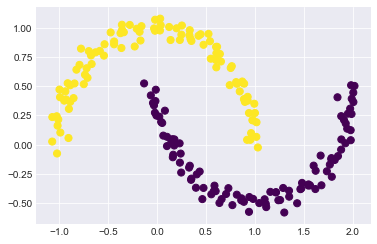

In [14]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

Additional Resources:
  - http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
  - http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
  - https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
  - https://www.quora.com/Whats-the-importance-of-whitening-transform-before-applying-k-means?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
  - https://en.wikipedia.org/wiki/Whitening_transformation
  - https://pythonprogramminglanguage.com/kmeans-elbow-method/
  - https://stackoverflow.com/questions/18285434/how-do-i-choose-k-when-using-k-means-clustering-with-silhouette-function
  - https://datascience.stackexchange.com/questions/6508/k-means-incoherent-behaviour-choosing-k-with-elbow-method-bic-variance-explain